In [1]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv, kv, jn_zeros
from scipy.optimize import fsolve

In [2]:
def gen_eigen_eq(v,l):
    def wrapper(u):
        w = np.sqrt(v*v-u*u)
        return u*jv(l-1, u)/jv(l,u) + w*kv(l-1, w)/kv(l, w)
    return wrapper

In [3]:
def left_side_eigen_eq(v, l):
    def wrapper(u):
        return u*jv(l-1,u)/jv(l,u)
    return wrapper

In [4]:
def find_max_jn_zeros(v, l):
    lo = 1
    while jn_zeros(l, lo)[-1] < v:
        lo += 1
    maxn = lo
    return maxn-1

find_max_jn_zeros(v=2.406, l=1)

0

In [5]:
def get_init_points_to_solve(v, l):
    offset1 = 0.000001
    offset2 = 0.5
    lhs_eq_at_v = left_side_eigen_eq(v, l)(v)
    maxn = find_max_jn_zeros(v, l)
    if maxn == 0:
        if lhs_eq_at_v > 0:
            return None
        else:
            init_points = v-offset1
            return init_points
    else:
        init_points = jn_zeros(l, maxn) - offset2
        if lhs_eq_at_v > 0:
            return init_points
        else:
            return np.append(init_points, v-offset1)

print(get_init_points_to_solve(v=2.4, l=1))

None


In [6]:
def get_roots_for_u(v, l):
    init_points = get_init_points_to_solve(v, l)
    if np.size(init_points) < 2 and init_points is None:
        return None
    with warnings.catch_warnings():
        warnings.simplefilter("error", RuntimeWarning)
        try:
            roots = fsolve(gen_eigen_eq(v, l), init_points)
        except RuntimeWarning as e:
            print(f"RuntimeWarning: {e}")
            print("The last solution is replaced by a value near V.")
            roots = fsolve(gen_eigen_eq(v, l), init_points[:-1])
            roots = np.append(roots, init_points[-1])
        finally:
            return roots

get_roots_for_u(v=2.4, l=1)

In [7]:
def get_all_mode_set(v, l):
    dict_u = {}
    l = 0
    for i in 


SyntaxError: invalid syntax (2006670863.py, line 4)

2
lhs_eq_at_v = -56.572401360626785
Init_points to solve: [3.33170597 6.51558667 9.999999  ]
====== get roots ======
roots are : [3.47699168 6.33102738 9.04628405]


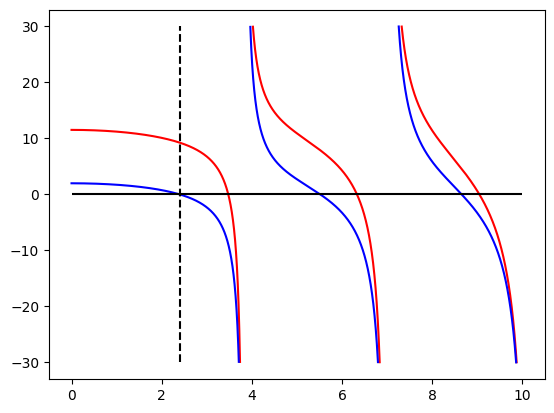

In [ ]:
v = 10
l = 1

plot_lim = 3*v
u = np.linspace(0.0000001, v-0.000001, int(v*2000))
eigen_eq = gen_eigen_eq(v, l)(u)
meigen_eq = np.where(abs(eigen_eq)>plot_lim, None, eigen_eq)
left_eq = left_side_eigen_eq(v, l)(u)
mleft_eq = np.where(abs(left_eq)>plot_lim, None, left_eq)
plt.plot(u, meigen_eq, color='red') # plot eigen value equation
plt.plot(u, mleft_eq, color='blue') # plot left-side of eigen-value equation
plt.hlines(0, xmin=0, xmax=v, colors='k')
maxn = find_max_jn_zeros(v, l)
print(maxn)
plt.vlines(2.405, ymin=-plot_lim, ymax=plot_lim, linestyles='dashed', colors='k')
# plt.vlines(jn_zeros(l, maxn), ymin=-plot_lim, ymax=plot_lim, linestyles='dashed', colors='k')

print(f"lhs_eq_at_v = {left_side_eigen_eq(v,l)(v)}")
init_points = get_init_points_to_solve(v, l)
print(f"Init_points to solve: {init_points}")

print("====== get roots ======")
roots = get_roots_for_u(v, l)
print(f"roots are : {roots}")